In [121]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
read_data=pd.read_csv('/Users/HP/OneDrive/Desktop/archive/output.csv')

In [125]:
def new_sex(sex):
    if sex[0]=='M':
        return 1
    else:
        return 0

In [127]:
def new_A(A):
    if A[0]=='Y':
        return 0
    else:
        return 1

In [129]:
read_data['Sex']=read_data['Sex'].apply(new_sex)

In [131]:
read_data['Anaemic']=read_data['Anaemic'].apply(new_A)

In [133]:
read_data

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,0
1,2,0,45.6033,28.1900,26.2067,13.5,1
2,3,0,45.0107,28.9677,26.0215,11.7,1
3,4,0,44.5398,28.9899,26.4703,13.5,1
4,5,1,43.2870,30.6972,26.0158,12.4,1
...,...,...,...,...,...,...,...
99,100,0,49.9999,29.2860,20.7141,14.5,0
100,101,1,42.2324,30.6757,27.0919,6.3,0
101,102,0,45.6064,31.9084,22.4852,12.7,1
102,103,1,45.2095,29.2769,25.5136,13.4,1


In [135]:
from sklearn.preprocessing import StandardScaler

In [137]:
scaler= StandardScaler()

In [139]:
scaled=scaler.fit_transform(read_data.drop('Anaemic',axis=1))

In [141]:
new_data= pd.DataFrame(scaled,columns=read_data.columns[:-1])

In [143]:
new_data

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb
0,-1.715476,0.943880,-0.855838,1.271407,0.218811,-2.339593
1,-1.682166,-1.059457,-0.018152,-0.443182,0.372828,0.539433
2,-1.648855,-1.059457,-0.229589,0.059603,0.279061,-0.180324
3,-1.615545,-1.059457,-0.397605,0.073956,0.506289,0.539433
4,-1.582235,0.943880,-0.844599,1.177729,0.276175,0.099582
...,...,...,...,...,...,...
99,1.582235,-1.059457,1.550538,0.265385,-2.408085,0.939298
100,1.615545,0.943880,-1.220876,1.163829,0.821006,-2.339593
101,1.648855,-1.059457,-0.017046,1.960773,-1.511374,0.219541
102,1.682166,0.943880,-0.158658,0.259502,0.021910,0.499446


In [145]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,Y_train,Y_test= train_test_split(new_data,read_data['Anaemic'],test_size=0.2,random_state=101)

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
knn = KNeighborsClassifier(n_neighbors=1)

In [153]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [155]:
predictions= knn.predict(X_test)

In [157]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [159]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [161]:
print(confusion_matrix(Y_test,predictions))

[[ 3  1]
 [ 1 16]]


In [163]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.94      0.94      0.94        17

    accuracy                           0.90        21
   macro avg       0.85      0.85      0.85        21
weighted avg       0.90      0.90      0.90        21



In [169]:
error_rate= []
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

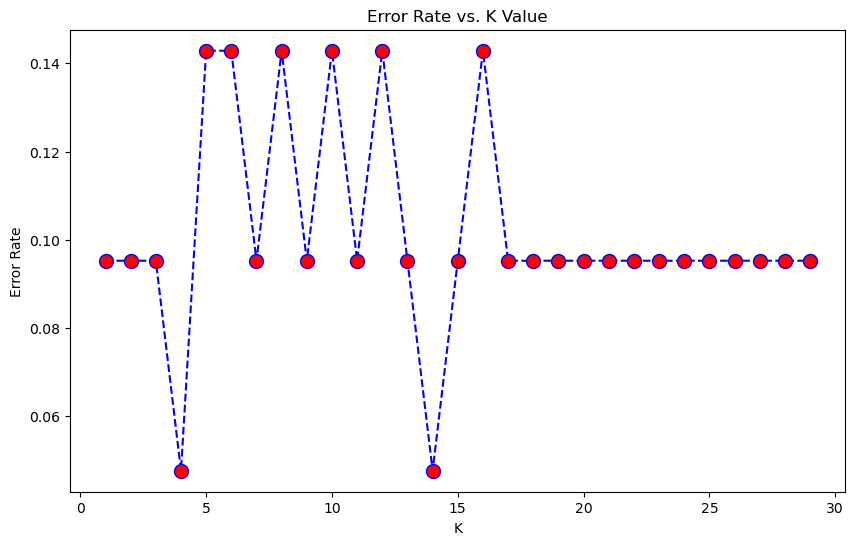

In [171]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [201]:
knn=KNeighborsClassifier(n_neighbors=4)

In [203]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [205]:
pred= knn.predict(X_test)

In [207]:
print('WITH K=4')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')

print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))

WITH K=4


[[ 4  0]
 [ 1 16]]


              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.94      0.97        17

    accuracy                           0.95        21
   macro avg       0.90      0.97      0.93        21
weighted avg       0.96      0.95      0.95        21

0.9523809523809523


In [211]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,Y_train)

print('WITH K=14')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')

print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))

WITH K=14


[[ 4  0]
 [ 1 16]]


              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.94      0.97        17

    accuracy                           0.95        21
   macro avg       0.90      0.97      0.93        21
weighted avg       0.96      0.95      0.95        21

0.9523809523809523


In [219]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=20)

In [221]:
print('WITH K=20')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')

print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))

WITH K=20


[[ 4  0]
 [ 1 16]]


              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.94      0.97        17

    accuracy                           0.95        21
   macro avg       0.90      0.97      0.93        21
weighted avg       0.96      0.95      0.95        21

0.9523809523809523
